# 3.2. 线性回归的从零开始实现


In [36]:
import random

# %matplotlib inline
import torch
from d2l.torch import d2l

## 3.2.1. 生成数据集

In [37]:
# 生成数据集

def synthetic_data(w, b, num_examples):  #@save
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

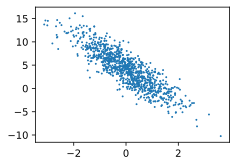

In [38]:
# 生成数据的散点图，
d2l.set_figsize()
d2l.plt.scatter(
    features[:, (1)].detach().numpy(),
    labels.detach().numpy(),
    1
);

## 3.2.2. 读取数据集

In [39]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)]
        )
    yield features[batch_indices], labels[batch_indices]

In [40]:
batch_size = 10
# 读取数据集
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.3178, -0.3073],
        [ 0.5418,  0.8370],
        [-1.1760, -0.3555],
        [ 1.2383,  1.5304],
        [-1.1155, -0.7003],
        [ 1.2769,  2.0631],
        [-0.3504,  0.1172],
        [ 0.4423,  0.0324],
        [ 0.5850,  1.8766],
        [ 1.4579, -0.3238]]) 
 tensor([[ 4.6117],
        [ 2.4266],
        [ 3.0678],
        [ 1.4637],
        [ 4.3518],
        [-0.2747],
        [ 3.0885],
        [ 4.9877],
        [-1.0249],
        [ 8.2126]])


## 3.2.3. 初始化模型参数

In [41]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## 3.2.4. 定义模型

In [42]:
def linreg(X, w, b):  #@save
    """线性回归模型。"""
    return torch.matmul(X, w) + b

## 3.2.5. 定义损失函数

In [43]:
def squared_loss(y_hat, y):  #@save
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 3.2.6. 定义优化算法

In [44]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降。"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()


## 3.2.7. 训练

In [45]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # `X`和`y`的小批量损失
        # 因为`l`形状是(`batch_size`, 1)，而不是一个标量。`l`中的所有元素被加到一起，
        # 并以此计算关于[`w`, `b`]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 15.630832
epoch 2, loss 14.887701
epoch 3, loss 13.564574


In [46]:
# 结果
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 1.6657, -3.0078], grad_fn=<SubBackward0>)
b的估计误差: tensor([3.8451], grad_fn=<RsubBackward1>)
